# 1. Author

**Student Name**:  George Hopkins

**Student ID**:  210011229

# 2. Problem formulation

The aim of this notebook is to create a classifier that can distinguish which theme song an individual is humming or whistling to, out of 8 theme songs.

# 3. Machine Learning pipeline

The pipeline will receive raw audio files for all 8 theme songs. They will be transformed into 12 features for each file, due to the huge sample size I am going to perform parallel computing on my local machine to speed up the process. Next, they will be split into a training and a testing dataset.
Four classifying models will be trained using the training dataset and tested using the testing dataset. The best performing model will then have it's hyperparameters tuned to optimise the model. The resulting output will be a probabilistic prediction of whether the audio file is from Harry Potter (0), Star Wars (1), Panther (2), Rain (3), Hakuna (4), Mamma (5), Showman (6) or Frozen (7).

Loading of Raw Data -------> Pre-Processing -------> Splitting of Dataset -------> Model Training & Testing -------> Hyper Parameter Tuning -------> Predictions

( Audio Instances -------> 12 features -------> Training & Testing Datasets -------> Testing Data -------> 0 - 7 )

# 4. Transformation stage

The input is in the form of thousands of instances within the audio file. 
This is to be transformed into fewer features that capture the nuances across the thousands of instances.

For this model, I will transform these instances to produce the pitch mean and pitch standard deviation for each sixth of the audio file, for each audio file. This will result in a total of 12 features (6 pitch means and 6 pitch standard deviations). The reasoning behind the large number of splits is that it will be better at noticing unique differing pitch changes within the theme tunes at different segments.

# 5. Modelling

A Logistic Regression model, a SVM model, a KNN model and a Random Forest model will be tested for their capability to perform the classification task. The model that has the highest accuracy will then have it's hyperparameters tuned on the training dataset to find the optimal model. Finally, the tuned model will be tested on the testing dataset for us to inspect it's true classifying ability.

# 6. Methodology

The data will be split to have 70% of instances in the training dataset and 30% of instances for the testing dataset.

When evaluating how the model classifies, we will inspect the accuracy score, the precision value, the recall value, the f1-score and the confusion matrix (via a heatmap).

# 7. Dataset

An array 'X' will be created to store the 12 attributes for each audio file.

An array 'y' will be created to store the corresponding label for each audio file.

In [1]:
# Importation of needed modules
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import os, sys, re, pickle, glob
import zipfile
import IPython.display as ipd
from tqdm import tqdm
import librosa
import warnings
warnings.filterwarnings('ignore')

# Connection to my google drive to access files
drive.mount('/content/drive')

Mounted at /content/drive


The only attributes we are concerned with are the audio signal attributes and the label.

For the purpose of this classifier, we are **not concerned** about the participant's personal information, whether it is a humm or whistle,  nor which instance of the participant each sample is.

In [2]:
# Loading of all audio files
# Some files had '.WAV' or '.Wav', So I changed them manually before hand
sample_path = '/content/drive/MyDrive/Data/MLEndHW/Potter1/*.wav'
Potter1_files = glob.glob(sample_path) 

sample_path = '/content/drive/MyDrive/Data/MLEndHW/Potter2/*.wav'
Potter2_files = glob.glob(sample_path)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/StarWars1/*.wav'
SW1_files = glob.glob(sample_path)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/StarWars2/*.wav'
SW2_files = glob.glob(sample_path)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/Panther1/*.wav'
Panther1_files = glob.glob(sample_path)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/Panther2/*.wav'
Panther2_files = glob.glob(sample_path)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/Rain1/*.wav'
Rain1_files = glob.glob(sample_path)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/Rain2/*.wav'
Rain2_files = glob.glob(sample_path)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/Hakuna1/*.wav'
Hakuna1_files = glob.glob(sample_path)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/Hakuna2/*.wav'
Hakuna2_files = glob.glob(sample_path)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/Mamma1/*.wav'
Mamma1_files = glob.glob(sample_path)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/Mamma2/*.wav'
Mamma2_files = glob.glob(sample_path)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/Showman1/*.wav'
Showman1_files = glob.glob(sample_path)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/Showman2/*.wav'
Showman2_files = glob.glob(sample_path)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/Frozen1/*.wav'
Frozen1_files = glob.glob(sample_path)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/Frozen2/*.wav'
Frozen2_files = glob.glob(sample_path)

files = [Potter1_files, Potter2_files, SW1_files, SW2_files, Panther1_files, Panther2_files, 
         Rain1_files, Rain2_files, Hakuna1_files, Hakuna2_files, Mamma1_files, Mamma2_files,
         Showman1_files, Showman2_files, Frozen1_files, Frozen2_files]

In [3]:
# Before deriving the attributes the data is going to be stored in a Pandas dataframe

# Creation of a list containing lists of length 2, to pass to the dataframe
label = 0
counter = 0
table = []
# Loop over each list in files
for i in files:
  counter += 1
  # Loop over each element of the list
  for j in i:
    # Creates a list for a df row, containing the file name + the corresponding label
    table.append([j,label])
  # Checks if a new song is being seen, changes the label if so
  if counter % 2 == 0:
    label += 1

# Creation of dataframe containing file name and label
df = pd.DataFrame(table,columns=['file_id','label']).set_index('file_id')

display(df)

,label
file_id,
/content/drive/MyDrive/Data/MLEndHW/Potter1/S1_hum_2_Potter.wav,0
/content/drive/MyDrive/Data/MLEndHW/Potter1/S1_whistle_2_Potter.wav,0
/content/drive/MyDrive/Data/MLEndHW/Potter1/S3_hum_1_Potter.wav,0
/content/drive/MyDrive/Data/MLEndHW/Potter1/S3_hum_2_Potter.wav,0
/content/drive/MyDrive/Data/MLEndHW/Potter1/S2_hum_2_Potter.wav,0
...,...
/content/drive/MyDrive/Data/MLEndHW/Frozen2/S221_hum_2_Frozen.wav,7
/content/drive/MyDrive/Data/MLEndHW/Frozen2/S222_hum_2_Frozen.wav,7
/content/drive/MyDrive/Data/MLEndHW/Frozen2/S222_whistle_2_Frozen.wav,7


Scripting of two functions to help extract the 12 attributes from each audio file.

In [4]:
# Function to extract the pitch from audio instances
def getPitch(x,fs,winLen=0.02):
    p = winLen*fs
    frame_length = int(2**int(p-1).bit_length())
    hop_length = frame_length//2
    f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
    return f0,voiced_flag

# Function to create the dataset
def get_Xy(files, scale_audio=False, onlySingleDigit=False):
    X,y = [], []
    for i in tqdm(files):
        y_label = i[1]
        # Loading file + extracting pitch
        fs = None
        x, fs = librosa.load(i[0], sr=fs)
        if scale_audio: x = x/np.max(np.abs(x))
        f0, voiced_flag = getPitch(x,fs,winLen=0.02)
        # Initialising increments of 1/6
        length = len(f0)
        increment1 = f0[:int(length * 1/6)]
        increment2 = f0[int(length * 1/6):int(length * 2/6)]
        increment3 = f0[int(length * 2/6):int(length * 3/6)]
        increment4 = f0[int(length * 3/6): int(length * 4/6)]
        increment5 = f0[int(length * 4/6): int(length * 5/6)]
        increment6 = f0[int(length * 5/6):]
        increments = [increment1, increment2, increment3, 
                  increment4, increment5, increment6]
        xs = []
        # Looping over each sixth
    for i in increments:
        pitch_mean = np.nanmean(i) if np.mean(np.isnan(i)) < 1 else 0
        pitch_sd = np.nanstd(i) if np.mean(np.isnan(i)) < 1 else 0
        xs.append(pitch_mean)
        xs.append(pitch_sd)
    X.append(xs)
    y.append(y_label)
    return np.array(X), np.array(y)

The final dataset is now ready to be initialised. For each file, the 12 attributes and corresponding label are produced and stored in 'X' and 'y'.

Parallel computing will be leveraged to speed up the process of generating the data.

In [5]:
# Creation of dataset
# There is a lot of data so I am going to utilise parallel computing to speed up the process
from multiprocessing import Pool
# Initialising the session
pool = Pool(processes=4)

# Splitting of the calculation into 4 smaller calculations, for my 4 processors to simultaneously compute
length = len(table)
X1_load = pool.apply_async(get_Xy, [table[:int(length * 1/4)]])
X2_load = pool.apply_async(get_Xy, [table[int(length * 1/4):int(length*2/4)]])
X3_load = pool.apply_async(get_Xy, [table[int(length * 2/4):int(length*3/4)]])
X4_load = pool.apply_async(get_Xy, [table[int(length*3/4):]])
X1, y1 = X1_load.get()
X2, y2 = X2_load.get()
X3, y3 = X3_load.get()
X4, y4 = X4_load.get()


100%|██████████| 829/829 [2:28:05<00:00, 10.72s/it]


The individual datasets returned from the parallel computing are combined to form the final dataset.

In [6]:
# Combining of data after parallel computing
# X array creation
X = []
for i in X1:
  X.append(i)
for i in X2:
  X.append(i)
for i in X3: 
  X.append(i)
for i in X4:
  X.append(i)
X = np.array(X)

# y array creation
y = []
for i in y1:
  y.append(i)
for i in y2:
  y.append(i)
for i in y3:
  y.append(i)
for i in y4:
  y.append(i)
y = np.array(y)

# Inspection of shape to be sure it has worked
print(X.shape)
print(y.shape)

(3318, 12)
(3318,)


For the accuracy score to be an effective metric, the dataset must be balanced.

In [7]:
# Quick check to see if our dataset is balanced

# First merging them in a dataframe
df_final = pd.DataFrame()
df = pd.DataFrame({'0':X[:,0], '1':X[:,1], '2':X[:,2], '3':X[:,3], '4':X[:,4], '5':X[:,5],
                   '6':X[:,6], '7':X[:,7], '8':X[:,8], '9': X[:,9], '10':X[:,10], '11':X[:,11]})
df['Y'] = pd.Series(y)
# Inspecting the counts of unique label values
print(df['Y'].value_counts())

1    417
4    416
3    415
0    415
7    414
5    414
6    414
2    413
Name: Y, dtype: int64


The dataset is sufficiently balanced. It is now ready to be used for training and testing.

# 8. Results

The data will now be split into a training dataset and a testing dataset.

In [8]:
# Splitting of dataset into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('The shape of the training independent variables: ' + str(X_train.shape))
print('The shape of the training dependent variable: ' + str(y_train.shape))
print('The shape of the testing independent variables: ' + str(X_test.shape))
print('The shape of the testing dependent variables: ' + str(y_test.shape))

The shape of the training independent variables: (2322, 12)
The shape of the training dependent variable: (2322,)
The shape of the testing independent variables: (996, 12)
The shape of the testing dependent variables: (996,)


A Logistic Regression model will be trained and tested.

Accuracy Score of Logistic Regression Classifier: 0.5131


Confusion Matrix:


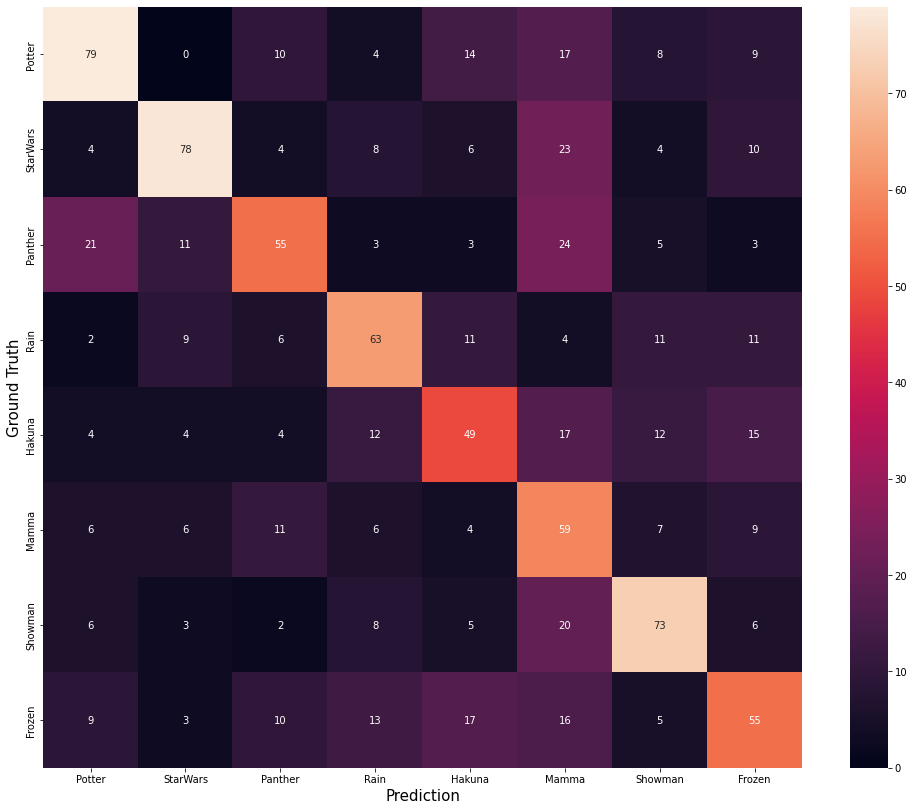



Precision, Recall & F1-Score: 
(0.5240452429078805, 0.512046430269662, 0.5130817528991929)


In [9]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
import seaborn as sns

logreg = LogisticRegression(max_iter = 150)
logreg.fit(X_train, y_train)
preds = logreg.predict(X_test)
print('Accuracy Score of Logistic Regression Classifier: ' + str(round(accuracy_score(y_test, preds),4)))
print('\n')
print('Confusion Matrix:')

conf = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf, index = [i for i in ['Potter','StarWars','Panther','Rain',
                                                'Hakuna','Mamma','Showman','Frozen']],
                  columns = [i for i in ['Potter','StarWars','Panther','Rain',
                                        'Hakuna','Mamma','Showman','Frozen']])
plt.figure(figsize = (17,14))
sns.heatmap(df_cm, annot=True)
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)
plt.show()
print('\n')

print('Precision, Recall & F1-Score: ' )
print(precision_recall_fscore_support(y_test, preds, average='macro')[0:3])

A Support-Vector Machine Model will be trained and tested.

Accuracy Score of SVM Classifier: 0.4468


Confusion Matrix:


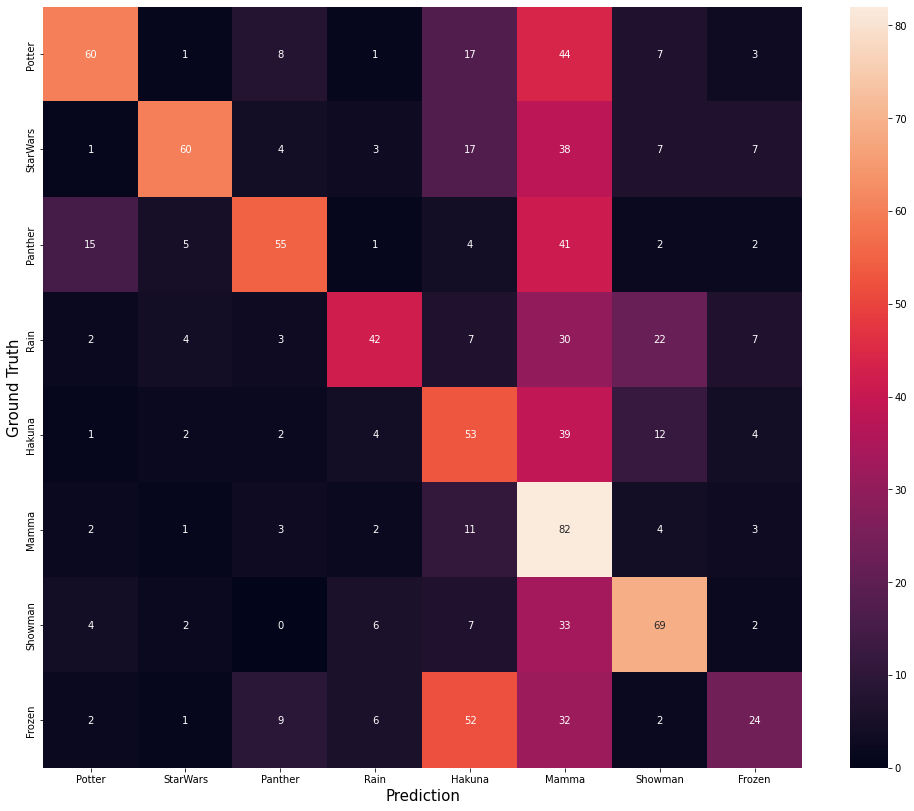



Precision, Recall & F1-Score: 
(0.5438683956449303, 0.4528986000317935, 0.45493610082755825)


In [10]:
# SVM Model
from sklearn import svm

svm = svm.SVC()
svm.fit(X_train, y_train)
preds = svm.predict(X_test)
print('Accuracy Score of SVM Classifier: ' + str(round(accuracy_score(y_test, preds),4)))
print('\n')
print('Confusion Matrix:')

conf = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf, index = [i for i in ['Potter','StarWars','Panther','Rain',
                                                'Hakuna','Mamma','Showman','Frozen']],
                  columns = [i for i in ['Potter','StarWars','Panther','Rain',
                                        'Hakuna','Mamma','Showman','Frozen']])
plt.figure(figsize = (17,14))
sns.heatmap(df_cm, annot=True)
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)
plt.show()
print('\n')

print('Precision, Recall & F1-Score: ' )
print(precision_recall_fscore_support(y_test, preds, average='macro')[0:3])

A KNN Model will be trained and tested.

Accuracy Score of K-Neighbours Classifier: 0.5462


Confusion Matrix:


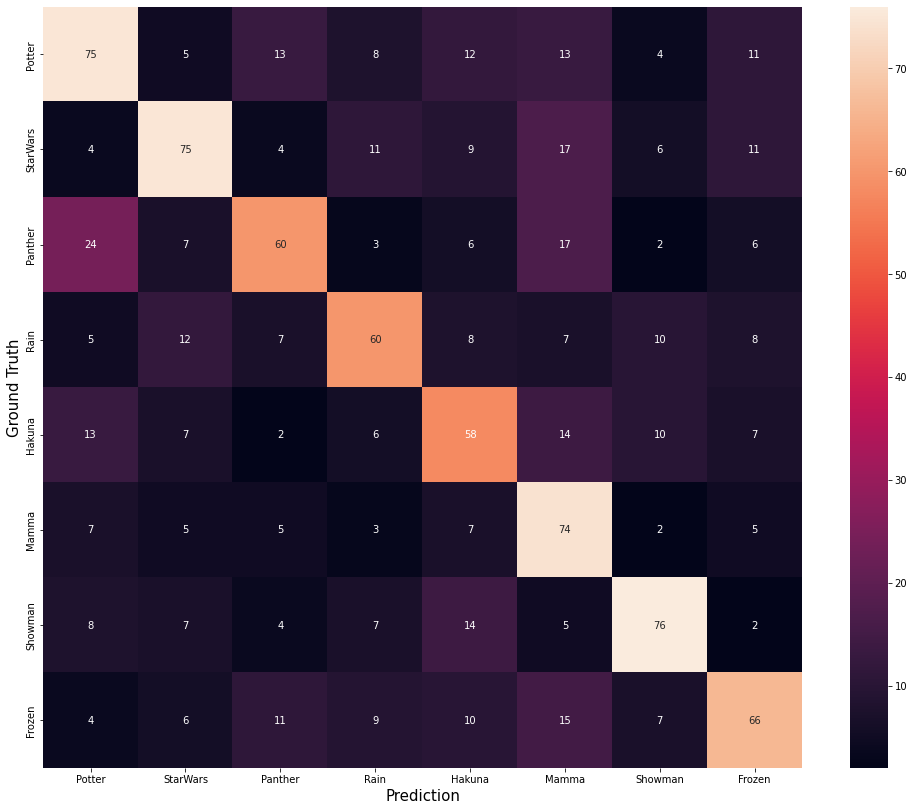



Precision, Recall & F1-Score: 
(0.5513010775683567, 0.5483254402106821, 0.5459385208653994)


In [11]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
print('Accuracy Score of K-Neighbours Classifier: ' + str(round(accuracy_score(y_test, preds),4)))
print('\n')
print('Confusion Matrix:')

conf = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf, index = [i for i in ['Potter','StarWars','Panther','Rain',
                                                'Hakuna','Mamma','Showman','Frozen']],
                  columns = [i for i in ['Potter','StarWars','Panther','Rain',
                                         'Hakuna','Mamma','Showman','Frozen']])

plt.figure(figsize = (17,14))
sns.heatmap(df_cm, annot=True)
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)
plt.show()
print('\n')

print('Precision, Recall & F1-Score: ' )
print(precision_recall_fscore_support(y_test, preds, average='macro')[0:3])

A Random Forest Model will be trained and tested.

Accuracy Score of Random Forest Classifier: 0.5773


Confusion Matrix:


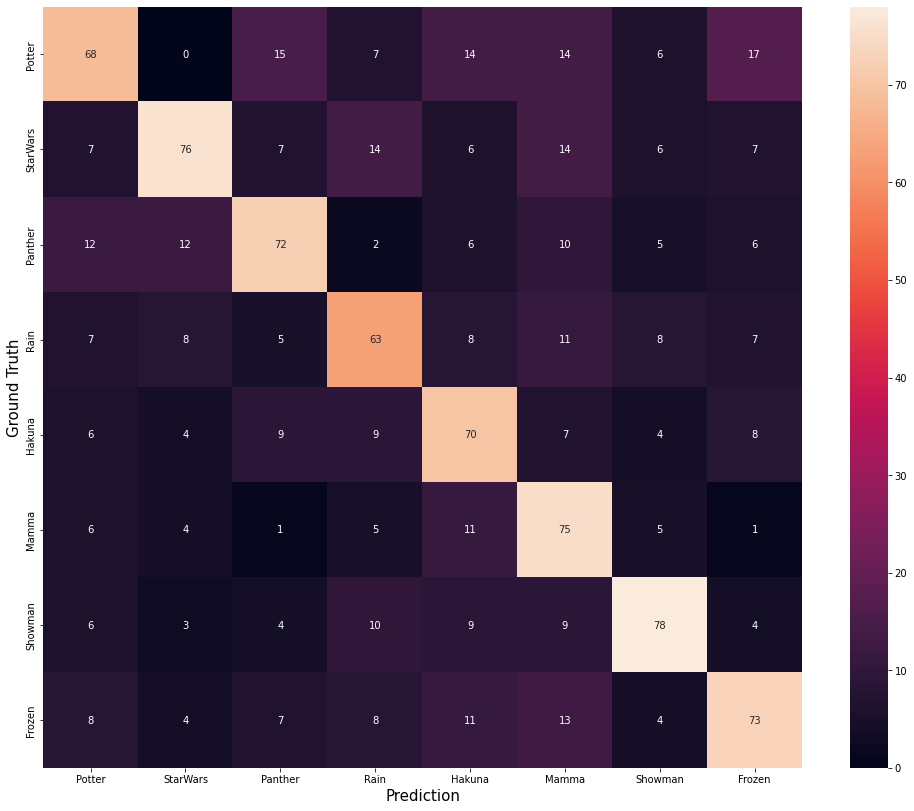



Precision, Recall & F1-Score: 
(0.5824842476810983, 0.5810836814691925, 0.5778203136033353)


In [12]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds = rf.predict(X_test)
print('Accuracy Score of Random Forest Classifier: ' + str(round(accuracy_score(y_test, preds),4)))
print('\n')
print('Confusion Matrix:')

conf = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf, index = [i for i in ['Potter','StarWars','Panther','Rain',
                                                'Hakuna','Mamma','Showman','Frozen']],
                  columns = [i for i in ['Potter','StarWars','Panther','Rain',
                                         'Hakuna','Mamma','Showman','Frozen']])

plt.figure(figsize = (17,14))
sns.heatmap(df_cm, annot=True)
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)
plt.show()
print('\n')

print('Precision, Recall & F1-Score: ' )
print(precision_recall_fscore_support(y_test, preds, average='macro')[0:3])

The Random Forest classifier produced the highest testing accuracy score, hence this model will have it's hyperparameters tuned.

In [13]:
# Hyperparameter Tuning of the Random Forest Model
from sklearn.model_selection import GridSearchCV

# Hyperparameter settings to test
max_depth = [5,10,20,30,50,60,100,None]
n_estimators = [10,50,100,150,200]
bootstrap = [True, False]
max_features = ['auto', 'sqrt']
settings = dict(max_depth=max_depth, n_estimators=n_estimators, bootstrap=bootstrap, max_features=max_features)

# Initialising Grid Search
clf = GridSearchCV(rf, settings, cv=5)
grid_results = clf.fit(X_train,y_train)

print('The accuracy score w/ the best hyperparameters: ' + str(grid_results.best_score_))
print('The optimal hyperparameters: ' + str(grid_results.best_params_))

The accuracy score w/ the best hyperparameters: 0.565456062291435
The optimal hyperparameters: {'bootstrap': False, 'max_depth': 60, 'max_features': 'sqrt', 'n_estimators': 200}


The optimal hyperparameters will be added to the model and tested on the testing data.

Accuracy Score of Random Forest Classifier: 0.5884


Confusion Matrix:


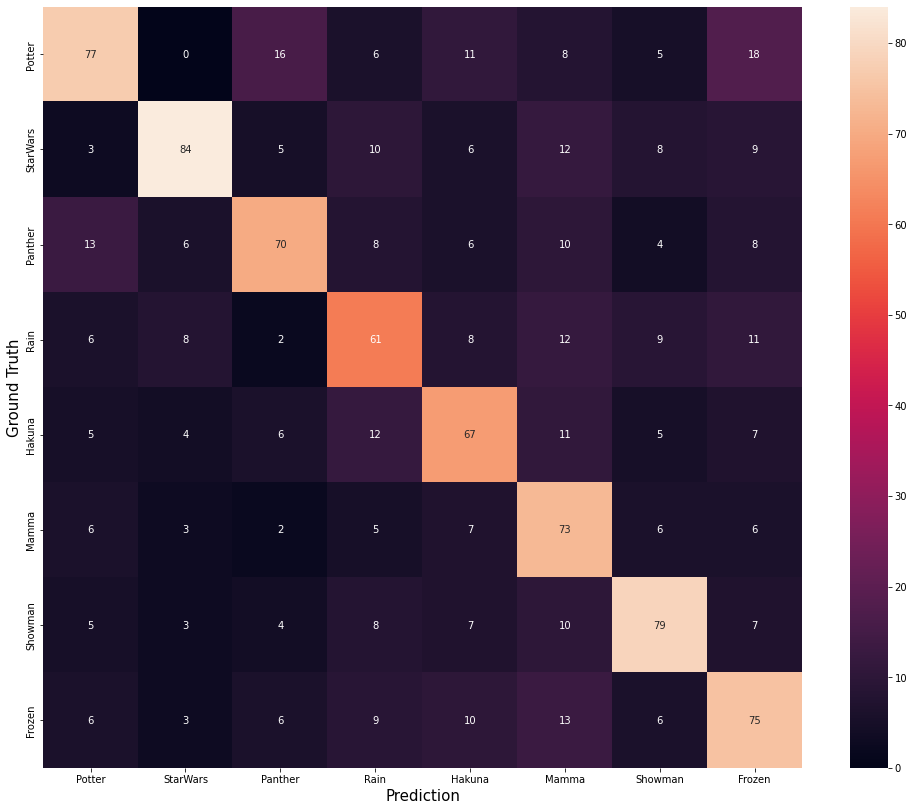



Precision, Recall & F1-Score: 
(0.5943656445957878, 0.589674364952347, 0.5883320905268264)


In [14]:
# Testing of Final Optimised RF Model
rf = RandomForestClassifier(bootstrap = True, max_depth = 20, max_features = 'auto', n_estimators = 200)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)
print('Accuracy Score of Random Forest Classifier: ' + str(round(accuracy_score(y_test, preds),4)))
print('\n')
print('Confusion Matrix:')

conf = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf, index = [i for i in ['Potter','StarWars','Panther','Rain',
                                                'Hakuna','Mamma','Showman','Frozen']],
                  columns = [i for i in ['Potter','StarWars','Panther','Rain',
                                         'Hakuna','Mamma','Showman','Frozen']])

plt.figure(figsize = (17,14))
sns.heatmap(df_cm, annot=True)
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)
plt.show()
print('\n')

print('Precision, Recall & F1-Score: ' )
print(precision_recall_fscore_support(y_test, preds, average='macro')[0:3])

The accuracy score increased by 0.0111 after hyperparameter tuning.

# 9. Conclusions

The tuned random forest classifier achieves an accuracy score of 0.59. If the classifier was randomly guessing, the accuracy with a large sample would tend to 0.125 (1/8). Therefore, I am satisfied with the classifier's ability to find distinguishable features. On the other hand, the model's accuracy score is far too low to for the model to be deployed into an application. 

To increase the accuracy of the model, several areas could be looked into:

1) The raw audio files could be better aligned to ensure the 6 segments are looking at the exact same part of the song.

2) Inspection of raw audio files to ensure there are no outlier samples.

3) Whether the distinction between hums and whistles offers better classification ability.